In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import mne
import mne_nirs

from mne_nirs.experimental_design import make_first_level_design_matrix
from mne_nirs.statistics import run_glm
from mne_nirs.channels import (get_long_channels, get_short_channels, picks_pair_to_idx)

from nilearn.plotting import plot_design_matrix

In [27]:
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
fnirs_raw_dir = os.path.join(fnirs_data_folder, 'Participant-1')
raw_intensity = mne.io.read_raw_nirx(fnirs_raw_dir).load_data()
# raw_intensity.resample(.7)

Loading /home/kernel/mne_data/MNE-fNIRS-motor-data/Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


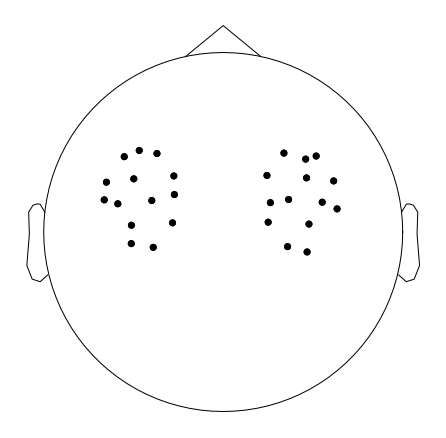

In [3]:
raw_intensity.plot_sensors();

In [4]:
raw_intensity.annotations.rename({'1.0':'Control', '2.0':'Tapping/Left', '3.0':'Tapping/Right'})


raw_intensity.annotations.delete(raw_intensity.annotations.description == '15')

raw_intensity.annotations.set_durations(5)

<Annotations | 92 segments: 15.0 (2), Control (30), Tapping/Left (30), ...>

In [28]:
raw_intensity.info['sfreq']

7.8125

In [26]:
raw_haemo.info['sfreq']

0.7

In [24]:
raw.info['sfreq']

7.137758743754461

In [ ]:
raw.resample

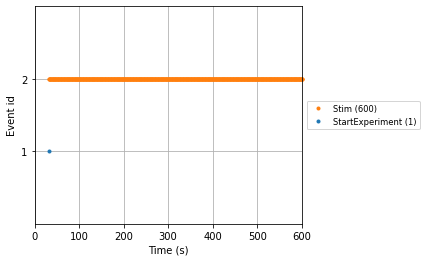

In [22]:
events, event_dict = mne.events_from_annotations(raw, verbose=False)
mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq']);

Used Annotations descriptions: ['StartExperiment', 'Stim']


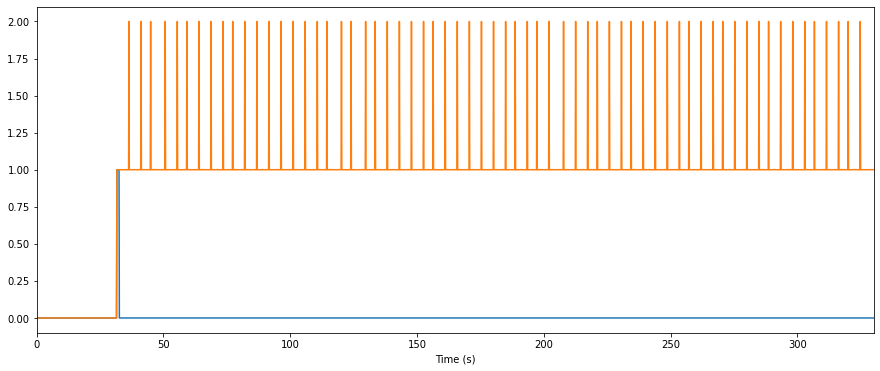

In [20]:
s=mne_nirs.experimental_design.create_boxcar(raw)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plt.plot(raw.times, s, axes=axes)
# plt.legend(['Control', 'Left', 'Right'])
plt.xlabel('Time (s)')
plt.xlim(0, 330);

In [10]:
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od)

In [11]:
short_chs = get_short_channels(raw_haemo)
# raw_haemo = get_long_channels(raw_haemo)

In [14]:
raw = mne.io.read_raw_snirf('../data_hojjat/dec_nef/3/test_001_S001_7d1123e_5.snirf')

Loading /home/kernel/Desktop/py_test/project/kernel_stuff/../data_hojjat/dec_nef/3/test_001_S001_7d1123e_5.snirf


In [15]:
design_matrix = make_first_level_design_matrix(raw, hrf_model='spm', stim_dur=5.0, drift_order=3, drift_model='polynomial')

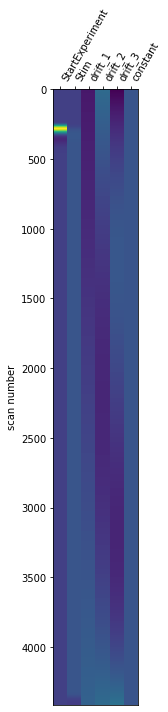

In [17]:
plot_design_matrix(design_matrix);